In [8]:
#imports
import random
import matplotlib.pyplot as plt
import numpy as np
import math

In [9]:
inliersTolerance = 2
inliersCount = 20
inliers = [(i + random.random()*inliersTolerance, 
            2*(i + random.random()*inliersTolerance))
           for i in range(0, inliersCount)]

outliersCount = 20
outliers = [(random.random()*outliersCount, 
             2*(random.random()*outliersCount))
            for i in range(0, outliersCount)]

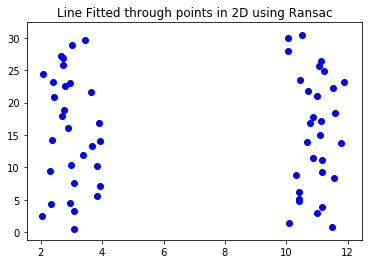

In [10]:
inliersCount = 30
inliersTolerance= 2


left_points = [(2 + random.random()*inliersTolerance, 
            i + random.random()*inliersTolerance)
           for i in range(0, inliersCount)]

right_points = [(10 + random.random()*inliersTolerance, 
            i + random.random()*inliersTolerance)
           for i in range(0, inliersCount)]
all_points = left_points+ right_points
for point in all_points:
    plt.scatter(point[0], point[1], color="blue")
plt.title('Line Fitted through points in 2D using Ransac')
plt.show()

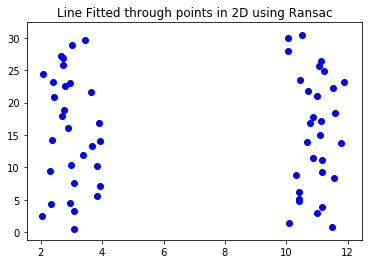

In [11]:
for point in all_points:
    plt.scatter(point[0], point[1], color="blue")
plt.title('Line Fitted through points in 2D using Ransac')
plt.show()

# print("inliers count = {0}".format(max_inliers))


In [12]:
# Line fitting algo
input : Q k
output : L l and L r
begin
for a certain number of iterations do
From Q k , randomly select a set of points on the left
side, L k , and a set of points on the right side, R k ,
where |L k |, |R k | ≥ 1 and |L k | + |R k | ≥ 3, compute
L l and L r based on (7);
Compute the distance from each point in Q k to L l
and L r , select a set of inliers from Q k on the left
and right sides, respectively, replace L k and R k with
the selected inlier sets;
if |L k | and |R k | are both larger than a threshold then
Compute a k , b l , and b r again using L k and R k
based on (7), then, compute the squared distance
(SD) from each point in L k to L l , and from each
point in R k to L r ;
if the mean SD is smaller than a threshold then
Break;
end
end
end
Return L l and L r with the minimum mean SD found.
end

SyntaxError: invalid syntax (<ipython-input-12-5d11a4093c1d>, line 2)

In [13]:
A[a,b_l,b_r].T = b
A = matrix


NameError: name 'b' is not defined

('lr_all_points', array([[10.67360461, 13.88722525],
       [11.01104291, 20.93719098],
       [11.22275912, 24.80798564],
       [11.14814519,  3.9192749 ],
       [11.07596242, 25.70022132],
       [10.77030831, 16.8315298 ],
       [10.07845849,  1.36791919],
       [11.16099008, 11.11561181],
       [11.1447031 , 17.21121394],
       [10.42435208,  4.7501314 ],
       [ 3.67024076, 13.23264811],
       [ 3.09733158,  0.47325553],
       [ 2.31479308,  9.49094672],
       [ 2.93947466,  4.48558469],
       [ 2.88141011, 16.08962553],
       [ 3.82804172,  5.50915222],
       [ 2.69516854, 17.88599261],
       [ 2.96069882, 22.97927838],
       [ 3.9368173 , 14.00836199],
       [ 3.09032687,  3.21908145]]))
('sum_r_y', 140.52830421143867)
('sum_lr_x_sqre', 1284.1890560320617)
('check, ', 1284.1890560320617, 31.414303436915112)
('A', array([[  31.41430344,   10.        ,    0.        ],
       [ 108.71032633,    0.        ,   10.        ],
       [1284.18905603,   31.41430344,  108.7

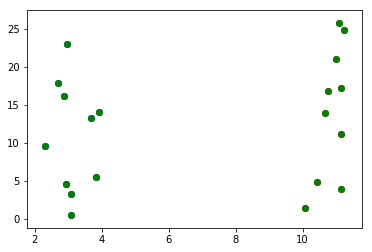

In [25]:
# algo starts
for _ in range(0,1):
    lk = ganerate_random_sets_points(len(left_points), 10)
    rk = ganerate_random_sets_points(len(right_points), 10)
    
    lk_points = np.array([left_points[i] for i in lk])
    rk_points = np.array([right_points[i] for i in rk])
    for point in rk_points:
        plt.scatter(point[0], point[1], color="red")
    for point in lk_points:
        plt.scatter(point[0], point[1], color="blue")
    lr_all_points = np.concatenate((rk_points, lk_points), axis=0)
    print("lr_all_points",lr_all_points)
    for point in lr_all_points:
        plt.scatter(point[0], point[1], color="green")
        
    sum_l_x = lk_points[:,0].sum()
    sum_l_y = lk_points[:,1].sum()
    sum_r_x = rk_points[:,0].sum()
    sum_r_y = rk_points[:,1].sum()
    print("sum_r_y", sum_r_y)
    sum_lr_x_sqre = (lr_all_points[:,0]*lr_all_points[:,0]).sum()
    print("sum_lr_x_sqre", sum_lr_x_sqre)
    print("check, " ,sum_lr_x_sqre, sum_l_x )
    
    A = np.array([
            [sum_l_x, len(lk_points), 0],
            [sum_r_x, 0, len(rk_points)],
            [sum_lr_x_sqre,sum_l_x, sum_r_x]
            ])
    print("A",A)
    
    sum_lr_xy_mul = (lr_all_points[:,0]*lr_all_points[:,1]).sum()
    print("sum_lr_xy_mul",sum_lr_xy_mul)
    
    b = np.array([sum_l_y,sum_r_y,sum_lr_xy_mul])
    print("b",b.T)
    
    coffs = np.matmul(A, b)
    print("coffs",coffs)
    
    coffs1 = np.matmul(b, A)
    print("coffs1",coffs1)
    

    
plt.show()    
    

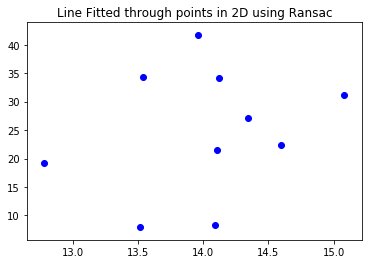

array([3.67024076, 3.09733158, 2.31479308, 2.93947466, 2.88141011,
       3.82804172, 2.69516854, 2.96069882, 3.9368173 , 3.09032687])

In [27]:
def ganerate_random_sets_points(len_of_points, number_of_sets = 10):
    rand_indexs = []
    while len(rand_indexs) < number_of_sets:
        ind = random.randint(0,len_of_points-1)
        if ind not in rand_indexs:
            rand_indexs.append(ind)
    return rand_indexs
ganerate_random_sets_points(21,10)

for point in rk_points+lk_points:
    plt.scatter(point[0], point[1], color="blue")
plt.title('Line Fitted through points in 2D using Ransac')
plt.show()
lk_points[:,1]
lk_points[:,0]



In [16]:
for point in rk_points+lk_points:
    plt.scatter(point[0], point[1], color="blue")
plt.title('Line Fitted through points in 2D using Ransac')
plt.show()

NameError: name 'rk_points' is not defined

In [17]:
lk_points[:,1]
lk_points[:,0]

NameError: name 'lk_points' is not defined

In [18]:
lk_points[:,0]

NameError: name 'lk_points' is not defined

In [19]:
(lk_points[:,0]*lk_points[:,0]).sum()

NameError: name 'lk_points' is not defined

In [20]:
a = np.array([[2,3,4],[2,3,4]])
b = np.array([[-1,2,33]])
c = a+b
print(a,b,c)

(array([[2, 3, 4],
       [2, 3, 4]]), array([[-1,  2, 33]]), array([[ 1,  5, 37],
       [ 1,  5, 37]]))


In [21]:
np.concatenate((a, b), axis=0)

array([[ 2,  3,  4],
       [ 2,  3,  4],
       [-1,  2, 33]])

In [22]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
a*b

array([[ 5, 12],
       [15, 24]])

In [23]:
a = np.array([[1, 2],
              [3, 4]])

b = a[:,0] * a[:,1]
b


array([ 2, 12])

In [24]:
a[:,1].sum()


6

In [ ]:
b*b

In [ ]:
inliersCount = 30
inliersTolerance= 2


left_points = [(2 + random.random()*inliersTolerance, 
            i + random.random()*inliersTolerance)
           for i in range(0, inliersCount)]

right_points = [(10 + random.random()*inliersTolerance, 
            i + random.random()*inliersTolerance)
           for i in range(0, inliersCount)]
all_points = left_points+ right_points
for point in all_points:
    plt.scatter(point[0], point[1], color="blue")
plt.title('Line Fitted through points in 2D using Ransac')
plt.show()